In this project, my goal is to understand the data thanks to Exploratory Data Analysis and try to create accurate machine learning models which will predict charges for insurance based on existing features. The obstacle in this project is the size of the dataset and the limited number of features.

Here are some factors that are present in our dataset and affect how much health insurance premiums cost

age: age of the primary beneficiary

sex: insurance contractor gender, female, male

BMI: Body mass index, providing an understanding of the body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

In [1]:
# Importing the libraries 
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocessing Libraries
from sklearn.model_selection import train_test_split
from sklearn import model_selection

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV


# Machine Learning Libraries
from sklearn import linear_model
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
df = pd.read_csv(r'C:\\Users\\Bruce\\Downloads\\insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Exploratory Data Analysis

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

We can observe that dataset does not contain NUll values and we do not need to impute them or delete rows.


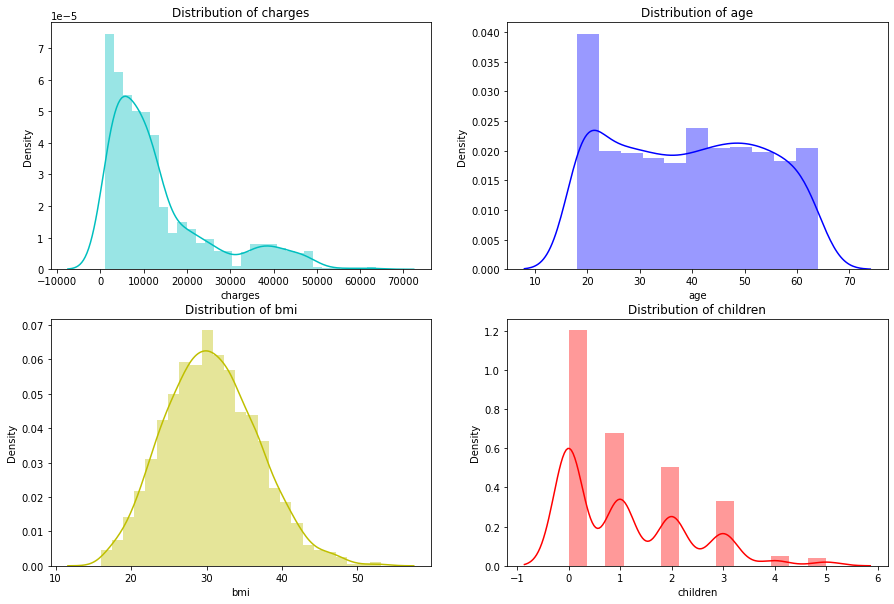

In [5]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.distplot(df["charges"],color='c')
plt.title('Distribution of charges',loc='center')

plt.subplot(2,2,2)
sns.distplot(df["age"],color='b')
plt.title('Distribution of age',loc='center')

plt.subplot(2,2,3)
sns.distplot(df["bmi"],color='y')
plt.title('Distribution of bmi',loc='center')

plt.subplot(2,2,4)
sns.distplot(df["children"],color='r')
plt.title('Distribution of children',loc='center');

The distribution of charges is skewed to the right. Most of the people in the dataset as like in real life are paying smaller charges if they are still young and are keeping a healthy lifestyle. Older and sick people will pay higher amounts of money for their insurance.

In the distribution graph for the age variable, we can see that for each group we see a similar count except for the youngest ones( 18-22) which is the biggest one.

For the BMI we can observe normal distribution which can describe a society that is getting fattier.
A healthy society should have BMI distribution skewed to the right.

The children distribution shows the distribution of children in a developed country in which families usually have a small number of children due to the high cost of providing good education and careers.

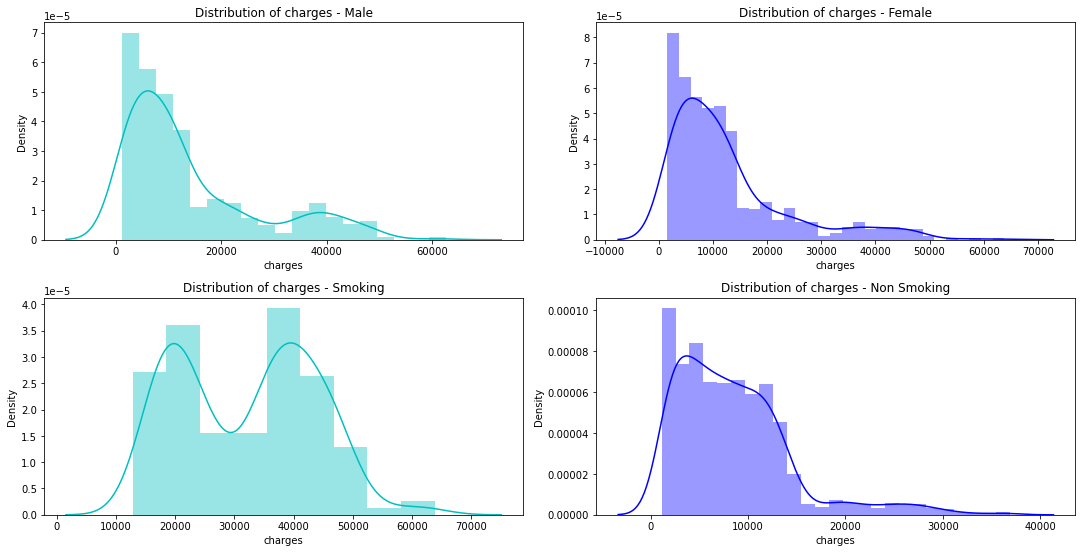

In [6]:
plt.figure(figsize = (15,15))
plt.subplot(4,2,1)
sns.distplot(df[df['sex']=='male']["charges"],color='c')
plt.title('Distribution of charges - Male',loc='center')

plt.subplot(4,2,2)
sns.distplot(df[df['sex']=='female']["charges"],color='b')
plt.title('Distribution of charges - Female',loc='center')

plt.subplot(4,2,3)
sns.distplot(df[df['smoker']=='yes']["charges"],color='c')
plt.title('Distribution of charges - Smoking',loc='center')

plt.subplot(4,2,4)
sns.distplot(df[df['smoker']=='no']["charges"],color='b')
plt.title('Distribution of charges - Non Smoking',loc='center')
plt.tight_layout()

The distribution of charges for Male and Female groups does not show big differences. For both groups, the distribution is slightly skewed to the right.
The distribution for the Smoking group is showing us an additional concentration of higher charge between 35 and 45 thousand. Those are additional costs that the smoking group has to spend on their treatment.

We can objectively determine if the variable is skewed using the Shapiro-Wilks test. The null hypothesis for this test is that the data is a sample from a normal distribution, so a p-value less than 0.05 indicates significant skewness. We’ll apply the test to the response variable Sale Price above labeled “resp” using Scipy.stats in Python.

In [7]:
from scipy.stats import shapiro
shapiro(df['charges'])

ShapiroResult(statistic=0.814687967300415, pvalue=1.150477698013898e-36)

In [8]:
from scipy.stats import shapiro
shapiro(df['age'])

ShapiroResult(statistic=0.9446991682052612, pvalue=5.687479624670986e-22)

A more convenient way of evaluating skewness is with pandas’ “.skew” method. It calculates the Fisher–Pearson standardized moment coefficient for all columns in a dataframe. 

In [9]:
num_feats = df.dtypes[df.dtypes!='object'].index
skew_feats = df[num_feats].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skew':skew_feats})

In [10]:
skewness

,Skew
charges,1.515880
children,0.938380
bmi,0.284047
age,0.055673


The transformation of skewed data will be continued in further part of notebook.

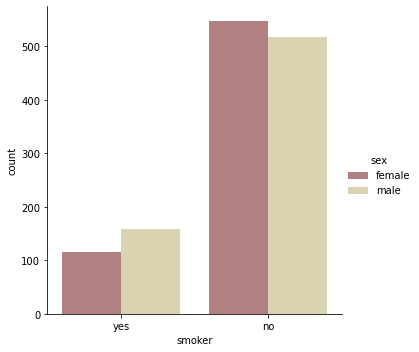

In [11]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=df);

We can notice that more male smokers than women smokers. This graph is aligned with the studies from which many show that men tend to smoke more than women.

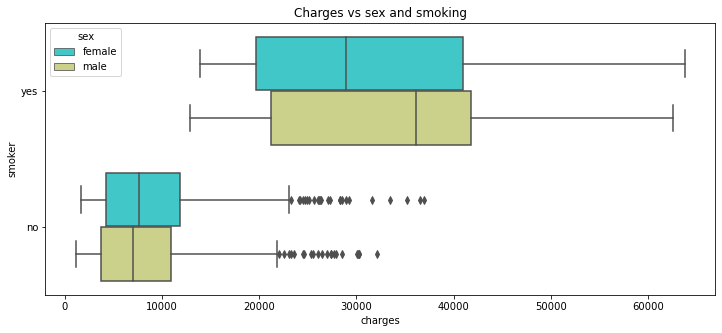

In [12]:
plt.figure(figsize=(12,5))
plt.title("Charges vs sex and smoking")
sns.boxplot(y="smoker", x="charges", data = df , orient="h",hue='sex', palette = 'rainbow');

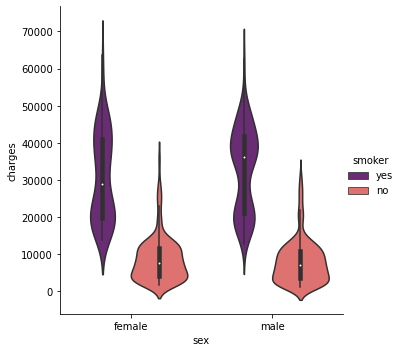

In [13]:
sns.catplot(x="sex", y="charges", hue="smoker",kind="violin", data=df, palette = 'magma');

Smoking is the biggest factor in the amount of insurance. Smoking males and females are paying for charges
much more that the not smoking ones.

On the violin graph, we can see that the density for nonsmoking group is much the big between 0 and 10000
and after that, we can see outliers for this group whose higher charges are probably due to other illnesses.

Text(0.5, 1.0, 'Charges vs age and smoking')

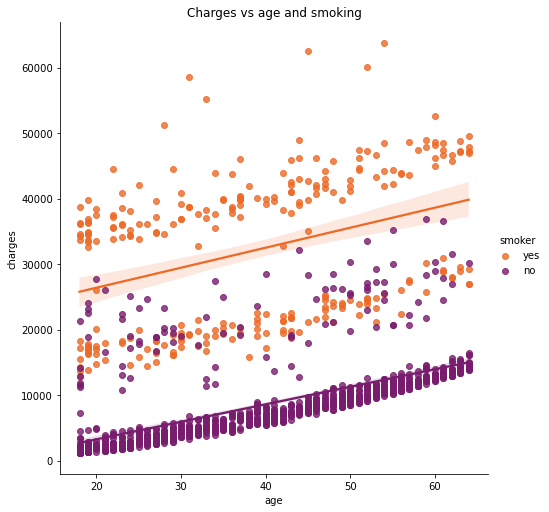

In [14]:
sns.lmplot(x="age", y="charges", hue="smoker", data=df, palette = 'inferno_r', size = 7);
plt.title("Charges vs age and smoking")

On this graph we observe that even on the same age smokers are paying higher charges for insurance that non smokers.

Text(0.5, 1.0, 'Charges vs bmi and smoking')

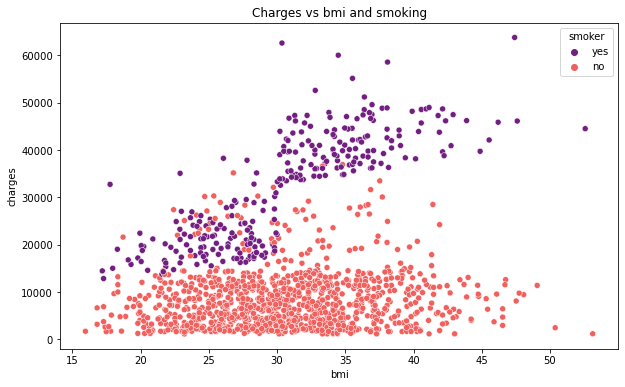

In [15]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=df,palette='magma',hue='smoker')
plt.title("Charges vs bmi and smoking")

The scatterplot shows clearly that smoking is a factor that increases charges. One interesting thing 
can be seen on the graph near 30 BMI.
A BMI higher than 30 is a sign of obesity. We can observe at this point on the graph a high increase 
in charges for obese smokers.

# Data transformation and creation of train and test data

Transformation of Charges column

<AxesSubplot:xlabel='charges', ylabel='Density'>

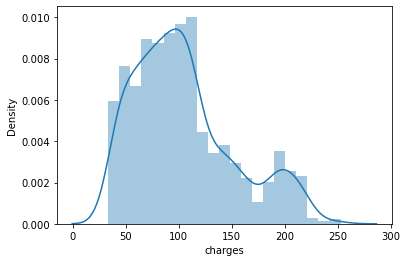

In [16]:
#Square Root Transformation
sqrt_charg = df['charges']**(0.5)
sns.distplot(sqrt_charg)

After transforming, the data is definitely less skewed, but there is still a long right tail.

<AxesSubplot:xlabel='charges', ylabel='Density'>

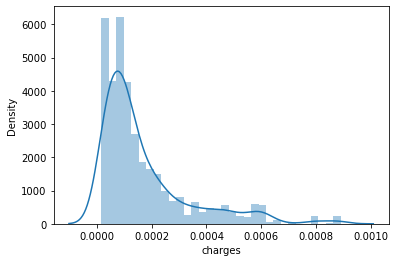

In [17]:
#Reciprocal Transformation
recip = 1/df['charges']
sns.distplot(recip)

The charges collumn is still skewed to the right after this transformation

<AxesSubplot:xlabel='charges', ylabel='Density'>

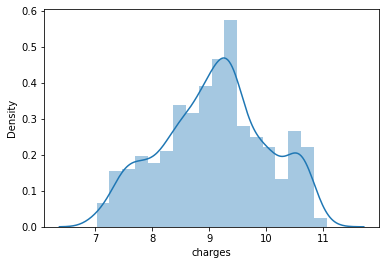

In [18]:
#Log Transformation
log_charg = np.log(df['charges'])
sns.distplot(log_charg)

The log transformation seems to be the best, as the distribution of transformed charges is the most symmetrical.

In [19]:
df['charges'] = log_charg

In [20]:
X = df.drop(['charges','region'], axis = 1)
y = df.charges
X = pd.get_dummies(X)

In [21]:
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.30, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling

In [22]:
# Importing libraries
from sklearn import linear_model
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

from sklearn.metrics import mean_squared_error,r2_score


import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

Lin_reg = linear_model.LinearRegression()
Lass_reg = linear_model.Lasso(alpha=0.1)
Ridge_reg = linear_model.Ridge(alpha=.5)
SVM_reg = svm.SVR()
KNN_reg = KNeighborsRegressor()
Tree_reg = DecisionTreeRegressor()
RF_reg = RandomForestRegressor()
XG_reg  = GradientBoostingRegressor()
AD_reg = AdaBoostRegressor()
models = []

models.append(('Lin_reg',Lin_reg))
models.append(('Lass_reg',Lass_reg))
models.append(('Ridge_reg',Ridge_reg))
models.append(('SVM_reg',SVM_reg))
models.append(('KNN_reg',KNN_reg))
models.append(('Tree_reg',Tree_reg))
models.append(('RF_reg',RF_reg))
models.append(('XG_reg',XG_reg))
models.append(('AD_reg',AD_reg))

# evaluating each model 
Final_results = pd.DataFrame(columns=['Model','RMSE'])
names = []
for name, model in models:
    
    model_train = model.fit(X_train,y_train)
    predictions = model_train.predict(X_test)
    lin_mse = mean_squared_error(y_test, predictions)
    lin_rmse = np.sqrt(lin_mse)
    R2 = r2_score(y_test,predictions)
    Final_results = Final_results.append({'Model':name,'RMSE':lin_rmse,'R2':R2},ignore_index=True)

In [23]:
Final_results

,Model,RMSE,R2
0,Lin_reg,0.428907,0.780319
1,Lass_reg,0.471039,0.735039
2,Ridge_reg,0.428912,0.780314
3,SVM_reg,0.372243,0.834530
4,KNN_reg,0.422274,0.787061
5,Tree_reg,0.505982,0.694271
6,RF_reg,0.404790,0.804329
7,XG_reg,0.380495,0.827112
8,AD_reg,0.497545,0.704381


The 2 best models were SVM_reg and XGBoost. In further steps I will run GridSearch algorithm and see if there is a potential to improve models performence.

In [24]:
#I have put best parameter fond by Gridsearch to limit the long compile time.
param_grid = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    'n_estimators' : [50,100,200,1000,2000],
    "min_samples_split": np.linspace(0.1, 2, 10),
    "min_samples_leaf": np.linspace(0.1, 2, 10),
    "max_depth":[3,5,8],
    }

gsXG = GridSearchCV(GradientBoostingRegressor(),param_grid=param_grid, cv= 5)
#gsXG = gsXG.fit(X_train, y_train)
#XG = GradientBoostingRegressor(**gsXG.best_params_).fit(X_train, y_train)
XG = GradientBoostingRegressor(learning_rate=0.025,max_depth=3,min_samples_leaf=0.1,
                              min_samples_split=0.1,n_estimators=200).fit(X_train, y_train)

predictions_XG = XG.predict(X_test)
lin_mse_XG = mean_squared_error(y_test, predictions_XG)
lin_rmse_XG = np.sqrt(lin_mse_XG)
R2_XG = r2_score(y_test,predictions)

In [25]:
param_grid = {
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    'gamma' : ["scale","auto"]
    }

gsSVC = GridSearchCV(svm.SVR(),param_grid=param_grid, cv= 5)
gsSVC = gsSVC.fit(X_train, y_train)
SVR = svm.SVR(**gsSVC.best_params_).fit(X_train,y_train)

predictions_SVR = SVR.predict(X_test)
lin_mse_SVR = mean_squared_error(y_test, predictions_SVR)
lin_rmse_SVR = np.sqrt(lin_mse_SVR )
R2_SVR = r2_score(y_test,predictions)

In [26]:

SVR_list = ['Support Vector Regression',lin_rmse_SVR, R2_SVR]
XGB_list = ['Gradient Boosting Classifier',lin_rmse_XG, R2_XG]


data_grid = [SVR_list,XGB_list]
Final_results_grid = pd.DataFrame(data_grid,columns=['Model', 'RMSE', 'R2'])
Final_results_grid

,Model,RMSE,R2
0,Support Vector Regression,0.372243,0.704381
1,Gradient Boosting Classifier,0.368541,0.704381


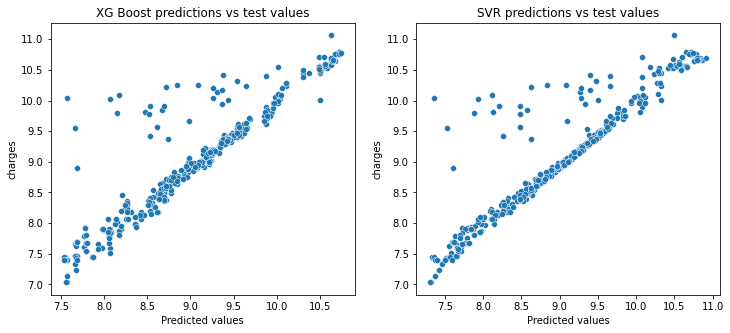

In [27]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("XG Boost predictions vs test values")
sns.scatterplot(predictions_XG,y_test)
plt.xlabel('Predicted values')

plt.subplot(1,2,2)
plt.title("SVR predictions vs test values")
sns.scatterplot(predictions_SVR,y_test)
plt.xlabel('Predicted values');

# Summary